In [193]:
#import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [194]:
friday=pd.read_csv("C:/Users/karthika/Downloads/Blackfridayyy.csv")

In [195]:
friday.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [196]:
friday.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
550063,1006033,P00372445,M,51-55,13,B,1,1,20,NaN,NaN,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,NaN,NaN,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,NaN,NaN,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,NaN,NaN,365
550067,1006039,P00371644,F,46-50,0,B,4+,1,20,NaN,NaN,490


In [197]:
friday.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [198]:
friday.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [199]:
friday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [126]:
friday.drop(['User_ID','Product_Category_3','Product_ID'],axis=1)

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,F,0-17,10,A,2,0,3,NaN,8370
1,F,0-17,10,A,2,0,1,6.0,15200
2,F,0-17,10,A,2,0,12,NaN,1422
3,F,0-17,10,A,2,0,12,14.0,1057
4,M,55+,16,C,4+,0,8,NaN,7969
...,...,...,...,...,...,...,...,...,...
550063,M,51-55,13,B,1,1,20,NaN,368
550064,F,26-35,1,C,3,0,20,NaN,371
550065,F,26-35,15,B,4+,1,20,NaN,137
550066,F,55+,1,C,2,0,20,NaN,365


In [200]:
friday.Product_Category_2.fillna('others',inplace=True)

In [201]:
friday.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

<AxesSubplot:xlabel='City_Category', ylabel='count'>

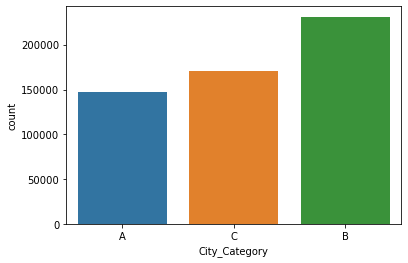

In [202]:
#City category(discrete)
sns.countplot(x="City_Category",data=friday)

In [203]:
part1=friday.Purchase[friday.City_Category=='A']
part2=friday.Purchase[friday.City_Category=='B']
part3=friday.Purchase[friday.City_Category=='C']

In [204]:
stats.f_oneway(part1,part2,part3)

F_onewayResult(statistic=1130.7459610102974, pvalue=0.0)

In [205]:
#Product_Category_2()
friday.Product_Category_2.unique()

array(['others', 6.0, 14.0, 2.0, 8.0, 15.0, 16.0, 11.0, 5.0, 3.0, 4.0,
       12.0, 9.0, 10.0, 17.0, 13.0, 7.0, 18.0], dtype=object)

In [206]:
friday.Product_Category_2.value_counts()

others    173638
8.0        64088
14.0       55108
2.0        49217
16.0       43255
15.0       37855
5.0        26235
4.0        25677
6.0        16466
11.0       14134
17.0       13320
13.0       10531
9.0         5693
12.0        5528
10.0        3043
3.0         2884
18.0        2770
7.0          626
Name: Product_Category_2, dtype: int64

In [207]:
part1=friday.Purchase[friday.Product_Category_2==8.0]
part2=friday.Purchase[friday.Product_Category_2==14.0]
part3=friday.Purchase[friday.Product_Category_2==2.0]
part4=friday.Purchase[friday.Product_Category_2==16.0]
part5=friday.Purchase[friday.Product_Category_2==15.0]
part6=friday.Purchase[friday.Product_Category_2==5.0]
part7=friday.Purchase[friday.Product_Category_2==4.0]
part8=friday.Purchase[friday.Product_Category_2==6.0]
part9=friday.Purchase[friday.Product_Category_2==11.0]
part10=friday.Purchase[friday.Product_Category_2==17.0]
part11=friday.Purchase[friday.Product_Category_2==13.0]
part12=friday.Purchase[friday.Product_Category_2==9.0]
part13=friday.Purchase[friday.Product_Category_2==12.0]
part14=friday.Purchase[friday.Product_Category_2==10.0]
part15=friday.Purchase[friday.Product_Category_2==3.0]
part16=friday.Purchase[friday.Product_Category_2==18.0]
part17=friday.Purchase[friday.Product_Category_2==7.0]


In [208]:
stats.f_oneway(part1,part2,part3,part4,part5,part6,part7,part8,part9,part10,part11,part12,part13,part14,part15,part16,part17)

F_onewayResult(statistic=3787.492550622429, pvalue=0.0)

In [209]:
y=friday.Purchase
x=friday[['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Product_Category_1','Product_Category_2']]

In [210]:
train_x,test_x,train_y,test_y=train_test_split(x,y,train_size=0.8,test_size=0.2,random_state=100)

In [211]:
train_x.shape

(440054, 7)

In [212]:
test_x.shape

(110014, 7)

C:\Users\karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

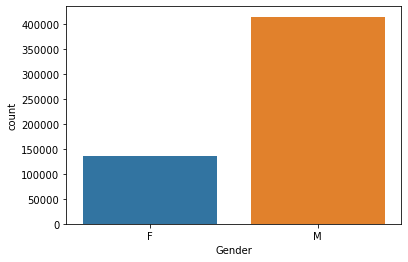

In [213]:
sns.countplot(friday.Gender)

In [214]:
friday.Age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

C:\Users\karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

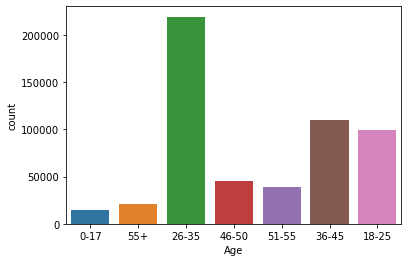

In [215]:
sns.countplot(friday.Age)

In [216]:
friday.Occupation.unique()

array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
        5, 14, 13,  6], dtype=int64)

C:\Users\karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='count'>

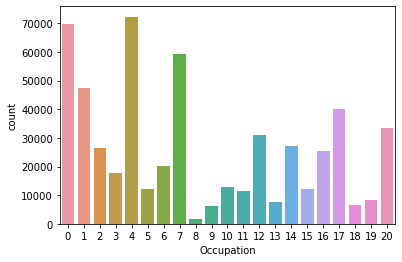

In [217]:
sns.countplot(friday.Occupation)

In [218]:
friday.City_Category.unique()

array(['A', 'C', 'B'], dtype=object)

C:\Users\karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='City_Category', ylabel='count'>

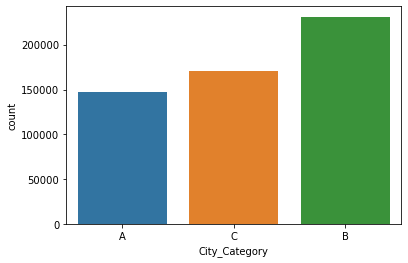

In [219]:
sns.countplot(friday.City_Category)

In [220]:
friday.Stay_In_Current_City_Years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

C:\Users\karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Stay_In_Current_City_Years', ylabel='count'>

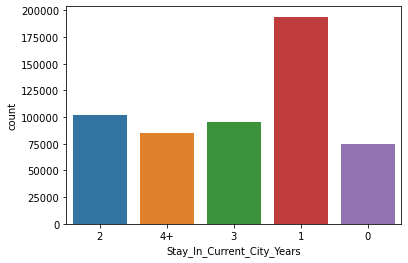

In [221]:
sns.countplot(friday.Stay_In_Current_City_Years)

In [222]:
friday.Marital_Status.unique()

array([0, 1], dtype=int64)

C:\Users\karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Marital_Status', ylabel='count'>

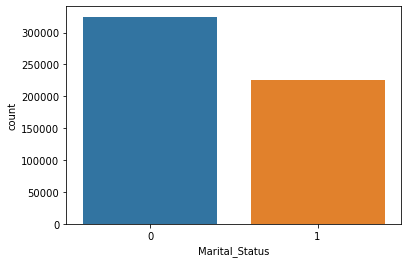

In [223]:
sns.countplot(friday.Marital_Status)

In [224]:
friday.Product_Category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9, 20, 19], dtype=int64)

C:\Users\karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='count'>

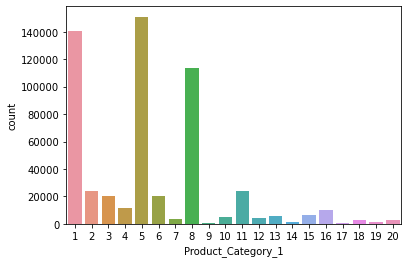

In [225]:
sns.countplot(friday.Product_Category_1)

In [226]:
friday.Product_Category_2.unique()

array(['others', 6.0, 14.0, 2.0, 8.0, 15.0, 16.0, 11.0, 5.0, 3.0, 4.0,
       12.0, 9.0, 10.0, 17.0, 13.0, 7.0, 18.0], dtype=object)

C:\Users\karthika\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='count'>

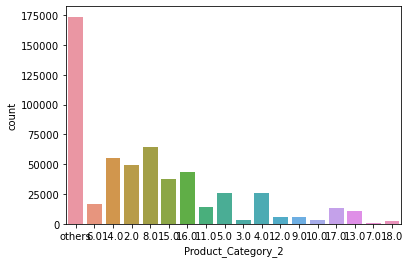

In [227]:
sns.countplot(friday.Product_Category_2)

In [228]:
friday.drop(["Product_Category_3","User_ID","Product_ID"],axis=1,inplace=True)

In [229]:
friday.columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Purchase'],
      dtype='object')

In [230]:
dummy_var=pd.get_dummies(friday)

In [231]:
dummy_var.columns

Index(['Occupation', 'Marital_Status', 'Product_Category_1', 'Purchase',
       'Gender_F', 'Gender_M', 'Age_0-17', 'Age_18-25', 'Age_26-35',
       'Age_36-45', 'Age_46-50', 'Age_51-55', 'Age_55+', 'City_Category_A',
       'City_Category_B', 'City_Category_C', 'Stay_In_Current_City_Years_0',
       'Stay_In_Current_City_Years_1', 'Stay_In_Current_City_Years_2',
       'Stay_In_Current_City_Years_3', 'Stay_In_Current_City_Years_4+',
       'Product_Category_2_2.0', 'Product_Category_2_3.0',
       'Product_Category_2_4.0', 'Product_Category_2_5.0',
       'Product_Category_2_6.0', 'Product_Category_2_7.0',
       'Product_Category_2_8.0', 'Product_Category_2_9.0',
       'Product_Category_2_10.0', 'Product_Category_2_11.0',
       'Product_Category_2_12.0', 'Product_Category_2_13.0',
       'Product_Category_2_14.0', 'Product_Category_2_15.0',
       'Product_Category_2_16.0', 'Product_Category_2_17.0',
       'Product_Category_2_18.0', 'Product_Category_2_others'],
      dtype='objec

In [232]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier 
from sklearn.linear_model import LinearRegression as LS

In [233]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [234]:
scaler_data=scaler.fit(dummy_var)
scaler_data=scaler.transform(dummy_var)

In [235]:
x=dummy_var.drop("Purchase",axis=1)

In [236]:
y=friday.Purchase

In [237]:
x.head()

,Occupation,Marital_Status,Product_Category_1,Gender_F,Gender_M,Age_0-17,Age_18-25,Age_26-35,Age_36-45,Age_46-50,...,Product_Category_2_10.0,Product_Category_2_11.0,Product_Category_2_12.0,Product_Category_2_13.0,Product_Category_2_14.0,Product_Category_2_15.0,Product_Category_2_16.0,Product_Category_2_17.0,Product_Category_2_18.0,Product_Category_2_others
0,10,0,3,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,10,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,10,0,12,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,10,0,12,1,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,16,0,8,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [238]:
y.head()

0     8370
1    15200
2     1422
3     1057
4     7969
Name: Purchase, dtype: int64

In [239]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.2,random_state=100)

In [240]:
model1=LS().fit(train_x,train_y)

In [241]:
model1.score(train_x,train_y)

0.20056074296066495

In [242]:
model1.score(x,y)

0.20039055029134323

<b>Random Forest</b>

In [243]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=100,random_state=0)
regressor.fit(train_x,train_y)

RandomForestRegressor(random_state=0)

In [171]:
regressor.score(train_x,train_y)

0.7425871014421032

In [172]:
regressor.score(test_x,test_y)

0.6403555150393627

<b>Gradient Boosting</b>

In [173]:
from sklearn.ensemble import GradientBoostingRegressor
regress=GradientBoostingRegressor(n_estimators=100,random_state=0)
regress.fit(train_x,train_y)

GradientBoostingRegressor(random_state=0)

In [174]:
regress.score(train_x,train_y)

0.6444191248202347

In [175]:
regress.score(test_x,test_y)

0.6411634981220404

<b>Ada boost</b>

In [176]:
from sklearn.ensemble import AdaBoostRegressor
reg=AdaBoostRegressor(n_estimators=100,random_state=0)
reg.fit(train_x,train_y)

AdaBoostRegressor(n_estimators=100, random_state=0)

In [177]:
reg.score(train_x,train_y)

0.4371545707899882

In [178]:
reg.score(test_x,test_y)

0.4328702071906262

<b>PCA</b>

In [179]:
from sklearn.decomposition import PCA

In [180]:
pca = PCA()
pca.fit(train_x,train_y)

PCA()

In [181]:
k1=(pca.explained_variance_ratio_)

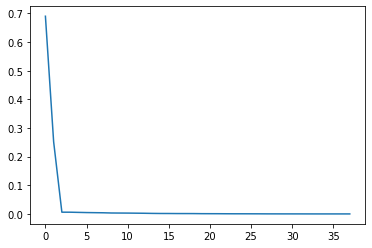

In [182]:
plt.plot(k1)

In [183]:
cumulative=np.cumsum(k1)
print(cumulative)

[0.69027074 0.94204461 0.94808073 0.9540715  0.95942881 0.96416796
 0.96851633 0.97251241 0.97574243 0.97878293 0.98166562 0.98424268
 0.98651084 0.98829888 0.9898125  0.99125514 0.99250135 0.99371223
 0.99486234 0.99571633 0.99648231 0.99719388 0.99774454 0.99820727
 0.99864918 0.99904274 0.99935917 0.99954718 0.99971171 0.99981197
 0.99989872 0.99998093 1.         1.         1.         1.
 1.         1.        ]


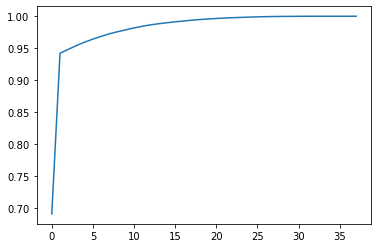

In [184]:
plt.plot(cumulative)

In [190]:
pca=PCA(n_components=35)
pca.fit(train_x)

PCA(n_components=35)

In [191]:
components=pca.transform(train_x)

In [244]:
components=pd.DataFrame(components)

In [246]:
components.head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,-4.027913,-4.443620,-0.494994,0.471058,0.038244,1.186697,-0.481934,-0.188588,-0.054133,-0.006260,...,0.020397,0.007977,-0.015930,0.003779,-0.008416,-0.008064,0.002110,-0.000714,3.457358e-16,4.189675e-16
1,1.970905,-4.398897,-0.300954,0.580897,-0.520943,0.602704,0.424850,-0.583683,0.012055,0.081124,...,0.040704,-0.015962,-0.024116,-0.000762,-0.010639,-0.008040,0.002956,-0.000516,2.142042e-15,1.078162e-15
2,-7.082693,-0.412586,0.498034,0.432574,1.326081,-0.593752,0.066941,-0.040890,0.690246,0.592425,...,0.023075,0.015234,-0.007416,0.000205,-0.000250,-0.004205,0.002836,-0.000163,-8.453687e-16,-4.319144e-16
3,-1.067567,-0.419322,-0.206944,-0.846189,0.311708,-0.215074,-0.344256,-0.578358,-0.454551,-0.039095,...,0.006219,0.003513,-0.008892,0.001016,-0.004715,-0.003356,0.000586,-0.000711,1.013566e-16,-6.848979e-17
4,-8.113212,5.559042,-0.156083,-0.725549,-0.681222,-0.609467,0.093758,0.065741,0.340322,0.490922,...,-0.030215,-0.022911,-0.003237,-0.003379,-0.001070,0.004334,-0.003207,-0.000774,-8.262868e-16,2.084847e-17
